In [2]:
from google.colab import files
uploaded = files.upload()


Saving demographic_info.csv to demographic_info (1).csv
Saving EEG_data.csv to EEG_data (1).csv


In [4]:
import pandas as pd

# Replace this with your actual file name
df = pd.read_csv('EEG_data.csv')  # or whatever name your uploaded file has

# Show basic info and a preview
print("Data shape:", df.shape)
df.head()


Data shape: (12811, 15)


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


 # Visualize EEG Waveform Behavior

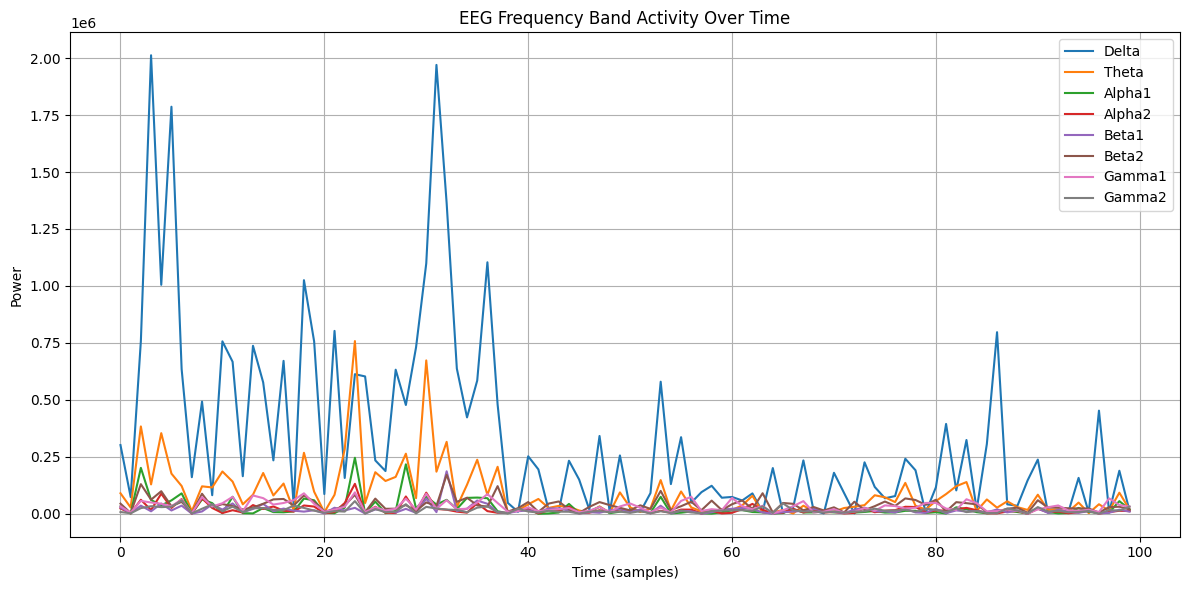

In [6]:
import matplotlib.pyplot as plt

# Choose a sample (e.g., first 100 rows for simplicity)
sample = df.iloc[:100]

# Plot selected EEG bands
bands = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']
plt.figure(figsize=(12,6))
for band in bands:
    plt.plot(sample[band], label=band)

plt.title('EEG Frequency Band Activity Over Time')
plt.xlabel('Time (samples)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### EEG Band Activity Over Time

This line graph visualizes the power of different EEG frequency bands (Delta, Theta, Alpha1, Alpha2, Beta1, Beta2, Gamma1, Gamma2) over the first 100 samples. Each band reflects different aspects of brain function—from deep sleep (Delta) to focused attention (Beta, Gamma).

In the context of Link Theory, these bands represent dynamic signal flow across potential neural motifs. Fluctuations indicate periods of stress, co-activation, or compensation, which can be interpreted as stress propagation or rerouting across a triangle motif. Peaks suggest increased neural load, while drops may reflect weakening or failure of a node.


# EEG Band Activity Trends (First 50 Samples)

This line graph shows how major EEG frequency bands behave over time across the first 50 recorded samples. Each colored line represents the signal strength (amplitude) of a different band.

- **Delta/Theta**: Often linked with deep rest, low alertness, or emotional overwhelm.
- **Alpha/Beta**: Associated with attention, wakefulness, and motor control.
- **Gamma**: Higher-order processing and potential markers of stress or confusion.

These fluctuations allow us to visually track how different brainwave patterns evolve, helping us later map triangle motif load and f


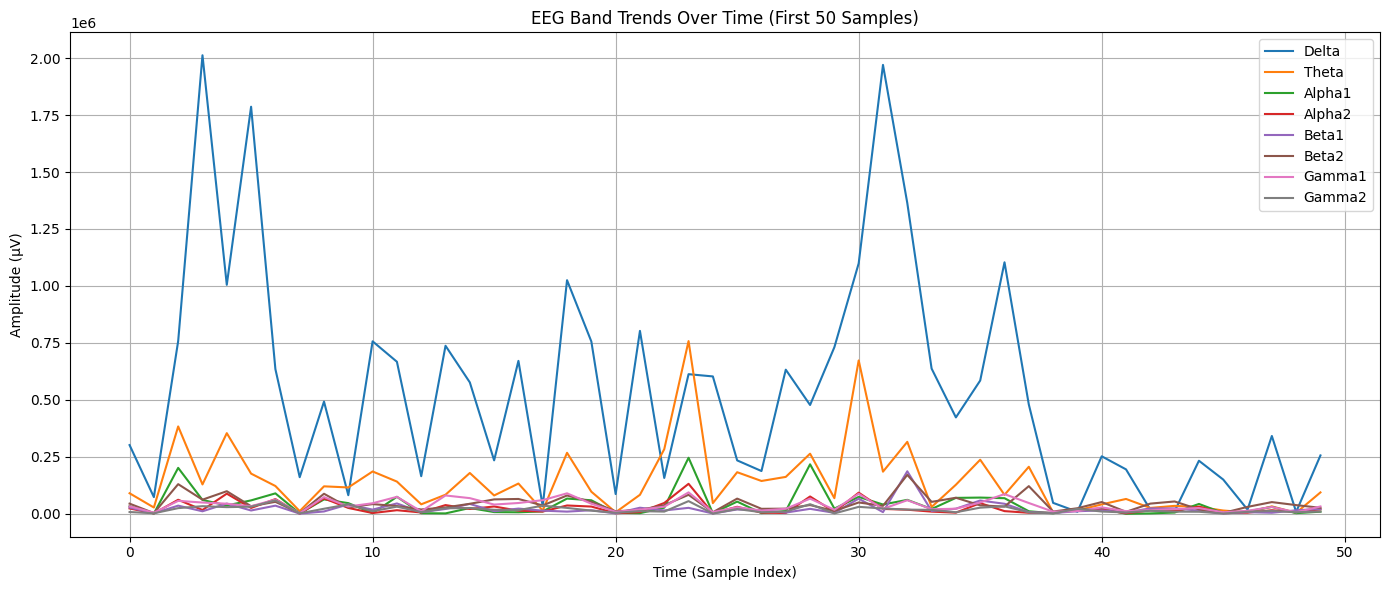

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (if not already loaded)
df = pd.read_csv("EEG_data.csv")

# Select a small subset for visualization
subset = df.iloc[:50]  # Adjust number of rows for clarity

# Define EEG bands to visualize
bands = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

# Plot
plt.figure(figsize=(14, 6))
for band in bands:
    plt.plot(subset.index, subset[band], label=band)

plt.title("EEG Band Trends Over Time (First 50 Samples)")
plt.xlabel("Time (Sample Index)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Correlation Matrix of EEG Bands

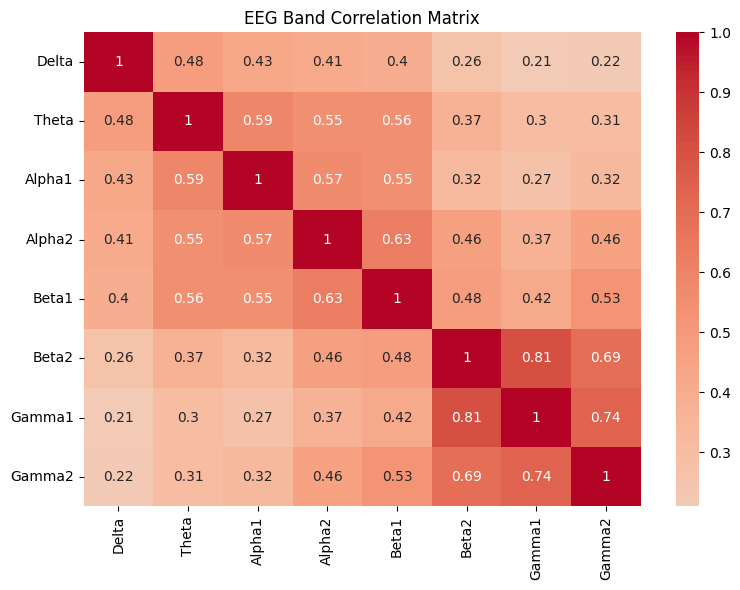

In [9]:
import seaborn as sns
import numpy as np

# Select only EEG bands
bands = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']
band_data = df[bands]

# Compute correlation matrix
correlation_matrix = band_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("EEG Band Correlation Matrix")
plt.tight_layout()
plt.show()


### Correlation Matrix of EEG Bands

This heatmap shows the Pearson correlation between different EEG frequency bands.

- High positive values (close to +1) indicate bands that activate together — suggesting potential *shared neural pathways* or coactivation zones.
- Negative values imply inverse relationships — when one band is active, the other tends to be suppressed.

This correlation map provides the mathematical foundation for building triangle motifs, where strongly correlated nodes (bands) can be treated as *edges* in a functional network graph.


# Constructing Triangle Motif Graphs from EEG Correlations

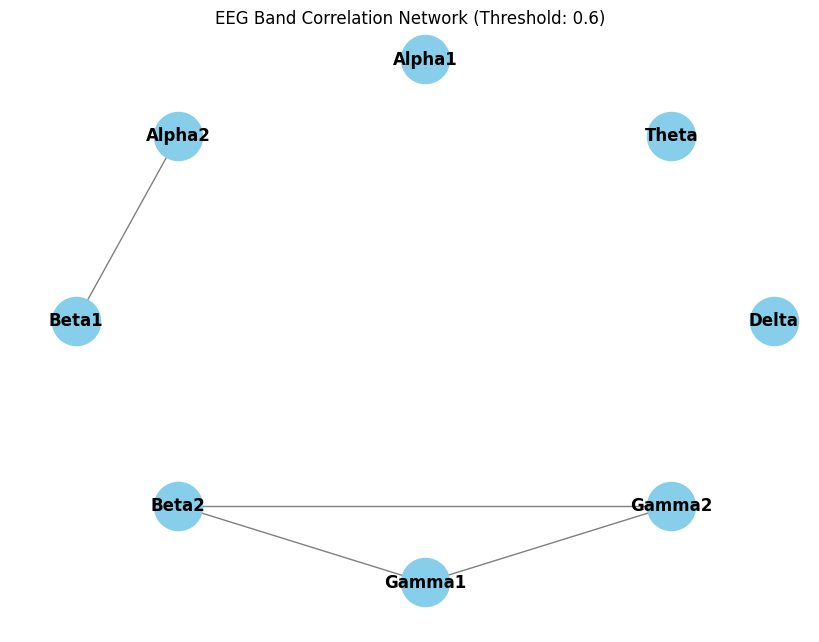

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Load EEG dataset
df = pd.read_csv("EEG_data.csv")

# Extract only EEG frequency band columns
bands = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']
eeg_data = df[bands]

# Compute correlation matrix
corr_matrix = eeg_data.corr()

# Set a lower threshold for edge creation
threshold = 0.6

# Create an empty graph
G = nx.Graph()

# Add EEG band nodes
for band in bands:
    G.add_node(band)

# Add edges for correlations above the threshold
for i in range(len(bands)):
    for j in range(i+1, len(bands)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            G.add_edge(bands[i], bands[j], weight=corr_matrix.iloc[i, j])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_weight='bold', edge_color='gray')
plt.title("EEG Band Correlation Network (Threshold: 0.6)")
plt.show()


### EEG Frequency Band Correlation Network

In this section, we constructed a correlation network using real EEG data. Each node represents a major EEG frequency band (e.g., Delta, Theta, Alpha1, etc.), and edges are drawn between nodes with a Pearson correlation coefficient above a defined threshold (e.g., 0.6).

The resulting network reflects co-activation patterns between frequency bands. Not all nodes are connected, which indicates natural variability in brainwave dynamics. Nodes that are connected form meaningful circuits — some of which may form triangle motifs, a key structural feature in Link Theory.

This correlation-based graph serves as the foundation for:
- Detecting stable or vulnerable neural motifs.
- Simulating stress propagation through EEG-derived circuits.
- Linking brainwave dynamics to motif integrity, rerouting, and potential collapse.

Only strong functional relationships are visualized to maintain biological interpretability and avoid noise. This model begins to bridge raw EEG data with the structural logic proposed in Link Theory.
